In [1]:
import pandas as pd
import numpy as np
from fractions import Fraction
import statsmodels.api as sm

# Import Data

In [2]:
commits = pd.read_csv("../inputs-outputs/commits.csv")
commits.dropna(inplace=True, axis=0)
commits

/tmp/ipykernel_4087/1239614662.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  commits = pd.read_csv("../inputs-outputs/commits.csv")


,PathFile,Commit hash,Commit timestamp,Subject
0,packages/react-components/react-checkbox/src/c...,4fad4cbbcbdb48847857c388135a3abda472add7,1679697439,fix: Fix vertical alignment of inline Checkbox...
1,apps/perf-test/package.json,3aa69e30ab692d4ea8335815cd6302636cdf9ba3,1679696710,applying package updates
2,apps/public-docsite-resources/package.json,3aa69e30ab692d4ea8335815cd6302636cdf9ba3,1679696710,applying package updates
3,apps/public-docsite-v9/package.json,3aa69e30ab692d4ea8335815cd6302636cdf9ba3,1679696710,applying package updates
4,apps/public-docsite/package.json,3aa69e30ab692d4ea8335815cd6302636cdf9ba3,1679696710,applying package updates
...,...,...,...,...
796661,src/app/pages/pages.module.ts,ed658566b3f15f402b10bf9b44cc02921eb9653f,1492183858,refator(@theme): add menu transclusion in one-...
796662,src/app/app.component.scss,d82d691681ca97e4764f75b9eada308518d795c8,1492161459,chore: base layout
796663,src/app/app.component.ts,d82d691681ca97e4764f75b9eada308518d795c8,1492161459,chore: base layout
796664,src/app/app.module.ts,d82d691681ca97e4764f75b9eada308518d795c8,1492161459,chore: base layout


In [3]:
metrics = pd.read_csv("../inputs-outputs/metrics.csv")
metrics.dropna(inplace=True, axis=0)
metrics

,Class,PathFile,Attributes,Methods,LOC,NOC,fanOut,WMC,LCOM
0,UninterpretedOption_NamePart,/home/school/MGL843/repos/ts-proto/integration...,3.0,0.0,6.0,3.0,0.0,0.0,0
1,HeroServiceClient,/home/school/MGL843/repos/ts-proto/integration...,0.0,6.0,14.0,6.0,0.0,-6.0,0
2,DashState,/home/school/MGL843/repos/ts-proto/integration...,0.0,2.0,5.0,2.0,0.0,-2.0,0
3,FieldMask,/home/school/MGL843/repos/ts-proto/integration...,1.0,0.0,5.0,1.0,0.0,0.0,0
4,SimpleWithSnakeCaseMap,/home/school/MGL843/repos/ts-proto/integration...,1.0,0.0,4.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
1276,ComponentToken,/home/school/MGL843/repos/ant-design/component...,3.0,0.0,6.0,3.0,0.0,0.0,0
1277,ThemeConfig,/home/school/MGL843/repos/ant-design/component...,5.0,0.0,8.0,5.0,0.0,0.0,0
1278,ComponentToken,/home/school/MGL843/repos/ant-design/component...,1.0,0.0,4.0,1.0,0.0,0.0,0
1279,ComponentToken,/home/school/MGL843/repos/ant-design/component...,3.0,0.0,6.0,3.0,0.0,0.0,0


In [4]:
projects = pd.read_csv("../inputs-outputs/models/repo_list.csv")
projects

,Project,Source,Model
0,fluentui,/home/school/MGL843/repos/fluentui,/home/school/MGL843/inputs-outputs/models/flue...
1,ant-design,/home/school/MGL843/repos/ant-design,/home/school/MGL843/inputs-outputs/models/ant-...
2,utopia,/home/school/MGL843/repos/utopia,/home/school/MGL843/inputs-outputs/models/utop...
3,berry,/home/school/MGL843/repos/berry,/home/school/MGL843/inputs-outputs/models/berr...
4,ts-proto,/home/school/MGL843/repos/ts-proto,/home/school/MGL843/inputs-outputs/models/ts-p...
5,next-auth,/home/school/MGL843/repos/next-auth,/home/school/MGL843/inputs-outputs/models/next...
6,superset,/home/school/MGL843/repos/superset,/home/school/MGL843/inputs-outputs/models/supe...
7,formatjs,/home/school/MGL843/repos/formatjs,/home/school/MGL843/inputs-outputs/models/form...
8,pxt,/home/school/MGL843/repos/pxt,/home/school/MGL843/inputs-outputs/models/pxt....
9,language-tools,/home/school/MGL843/repos/language-tools,/home/school/MGL843/inputs-outputs/models/lang...


# Preprocess Data

Let keep only commits fixing issues and get their frequency per file.

In [5]:
fix_commits = commits[commits["Subject"].str.contains("fix")]
fix_count = pd.DataFrame(fix_commits["PathFile"].value_counts())
fix_count.columns = ["FixCount"]
fix_count

,FixCount
package.json,1470
yarn.lock,708
src/packages/cli/package.json,378
src/packages/sdk/package.json,370
src/packages/engine-core/package.json,336
...,...
packages/client/components/MenuItemIcon.tsx,1
packages/client/components/MenuItemAvatar.tsx,1
packages/client/components/MeetingHelp/HelpMenuContent.tsx,1
superset-frontend/temporary_superset_ui/superset-ui/packages/superset-ui-chart/test/components/MockChartPlugins.tsx,1


Lets modify paths in the metrics data so that it matches the commit data.

In [6]:
for path in projects["Source"]:
    metrics["PathFile"] = metrics["PathFile"].str.removeprefix(path + '/')

metrics

,Class,PathFile,Attributes,Methods,LOC,NOC,fanOut,WMC,LCOM
0,UninterpretedOption_NamePart,integration/unknown-fields/google/protobuf/des...,3.0,0.0,6.0,3.0,0.0,0.0,0
1,HeroServiceClient,integration/nestjs-simple-usedate/hero.ts,0.0,6.0,14.0,6.0,0.0,-6.0,0
2,DashState,integration/grpc-web-go-server/example.ts,0.0,2.0,5.0,2.0,0.0,-2.0,0
3,FieldMask,integration/use-readonly-types/google/protobuf...,1.0,0.0,5.0,1.0,0.0,0.0,0
4,SimpleWithSnakeCaseMap,integration/simple-prototype-defaults/simple.ts,1.0,0.0,4.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
1276,ComponentToken,components/transfer/style/index.ts,3.0,0.0,6.0,3.0,0.0,0.0,0
1277,ThemeConfig,components/config-provider/context.ts,5.0,0.0,8.0,5.0,0.0,0.0,0
1278,ComponentToken,components/float-button/style/index.ts,1.0,0.0,4.0,1.0,0.0,0.0,0
1279,ComponentToken,components/mentions/style/index.ts,3.0,0.0,6.0,3.0,0.0,0.0,0


Lets assign all files to a single class by dropping all files containing more than one class. We can then use this column as the index.

In [7]:
metrics = metrics[metrics["PathFile"].duplicated() == False]
metrics

,Class,PathFile,Attributes,Methods,LOC,NOC,fanOut,WMC,LCOM
0,UninterpretedOption_NamePart,integration/unknown-fields/google/protobuf/des...,3.0,0.0,6.0,3.0,0.0,0.0,0
1,HeroServiceClient,integration/nestjs-simple-usedate/hero.ts,0.0,6.0,14.0,6.0,0.0,-6.0,0
2,DashState,integration/grpc-web-go-server/example.ts,0.0,2.0,5.0,2.0,0.0,-2.0,0
3,FieldMask,integration/use-readonly-types/google/protobuf...,1.0,0.0,5.0,1.0,0.0,0.0,0
4,SimpleWithSnakeCaseMap,integration/simple-prototype-defaults/simple.ts,1.0,0.0,4.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
1272,FontMapToken,components/theme/interface/maps/font.ts,17.0,0.0,108.0,17.0,0.0,0.0,0
1275,useAppProps,components/app/context.ts,3.0,0.0,6.0,3.0,0.0,0.0,0
1278,ComponentToken,components/float-button/style/index.ts,1.0,0.0,4.0,1.0,0.0,0.0,0
1279,ComponentToken,components/mentions/style/index.ts,3.0,0.0,6.0,3.0,0.0,0.0,0


Let convert the LCOM column to float.

In [8]:
metrics["LCOM"] = metrics["LCOM"].str.strip("()").apply(Fraction).astype('float')
metrics.dtypes

metrics["LCOM"].value_counts()

/tmp/ipykernel_4087/3393612512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics["LCOM"] = metrics["LCOM"].str.strip("()").apply(Fraction).astype('float')


0.000000    455
1.000000     15
0.500000     10
0.750000      5
1.250000      3
0.800000      3
1.666667      3
0.833333      3
0.666667      2
1.400000      2
0.900000      2
1.333333      2
0.920000      1
0.875000      1
0.966667      1
0.791667      1
1.027778      1
0.942105      1
1.750000      1
0.914286      1
1.200000      1
1.076923      1
1.041667      1
0.857143      1
0.708333      1
0.850000      1
1.500000      1
0.886364      1
0.928571      1
0.982143      1
0.916667      1
0.700000      1
1.875000      1
0.964286      1
Name: LCOM, dtype: int64

## Join the datasets

Lets associate each class to the the number of time it has been fixed. 

In [9]:
joined_data = metrics.join(fix_count, on="PathFile")
joined_data["FixCount"] = joined_data["FixCount"].fillna(0)
joined_data

,Class,PathFile,Attributes,Methods,LOC,NOC,fanOut,WMC,LCOM,FixCount
0,UninterpretedOption_NamePart,integration/unknown-fields/google/protobuf/des...,3.0,0.0,6.0,3.0,0.0,0.0,0.0,2.0
1,HeroServiceClient,integration/nestjs-simple-usedate/hero.ts,0.0,6.0,14.0,6.0,0.0,-6.0,0.0,0.0
2,DashState,integration/grpc-web-go-server/example.ts,0.0,2.0,5.0,2.0,0.0,-2.0,0.0,8.0
3,FieldMask,integration/use-readonly-types/google/protobuf...,1.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0
4,SimpleWithSnakeCaseMap,integration/simple-prototype-defaults/simple.ts,1.0,0.0,4.0,1.0,0.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...
1272,FontMapToken,components/theme/interface/maps/font.ts,17.0,0.0,108.0,17.0,0.0,0.0,0.0,0.0
1275,useAppProps,components/app/context.ts,3.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0
1278,ComponentToken,components/float-button/style/index.ts,1.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0
1279,ComponentToken,components/mentions/style/index.ts,3.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0


## Create the Dataset
Lets define the dependent variables as `X` and the independent variable as `y` where `0` denotes that no bug has been found and `1` denotes that at least one bug has been found.

In [10]:
X = joined_data[["Attributes", "Methods", "LOC", "NOC", "fanOut", "WMC", "LCOM"]]
y = (joined_data["FixCount"] > 0).astype(int)

None of the dependent variables seem to have a normal distribution (shown below). We must either normalize them or use a model that does not assume a normal distribution.

array([[<AxesSubplot:title={'center':'Attributes'}>,
        <AxesSubplot:title={'center':'Methods'}>,
        <AxesSubplot:title={'center':'LOC'}>],
       [<AxesSubplot:title={'center':'NOC'}>,
        <AxesSubplot:title={'center':'fanOut'}>,
        <AxesSubplot:title={'center':'WMC'}>],
       [<AxesSubplot:title={'center':'LCOM'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

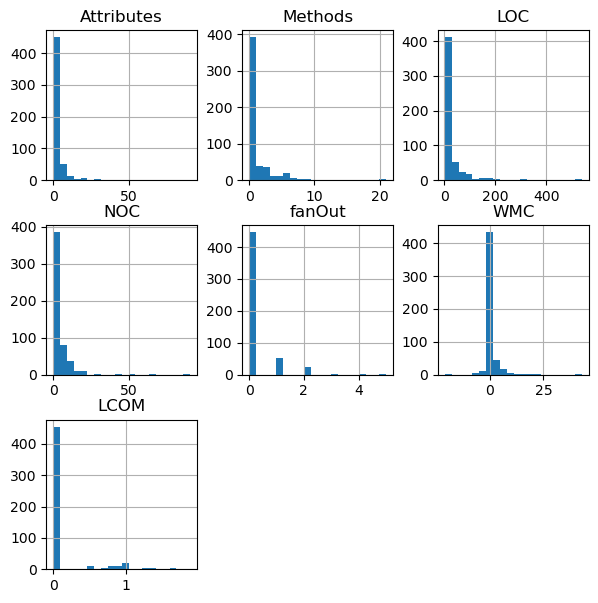

In [11]:
X.hist(figsize=(7,7), bins=20)

Next lets verify the assumption that the dependent variables are independent of each other.

In [12]:
X.corr(method='spearman')

,Attributes,Methods,LOC,NOC,fanOut,WMC,LCOM
Attributes,1.000000,0.077127,0.409481,0.802596,0.150256,0.246807,0.344329
Methods,0.077127,1.000000,0.615284,0.562239,0.526242,0.514387,0.663338
LOC,0.409481,0.615284,1.000000,0.651701,0.333091,0.551390,0.545670
NOC,0.802596,0.562239,0.651701,1.000000,0.346749,0.385326,0.515328
fanOut,0.150256,0.526242,0.333091,0.346749,1.000000,0.340867,0.464291
WMC,0.246807,0.514387,0.551390,0.385326,0.340867,1.000000,0.663737
LCOM,0.344329,0.663338,0.545670,0.515328,0.464291,0.663737,1.000000


The `Attributes` and `NOC` data have a correlation above 0.75. We will drop the `NOC` feature to maintain the independence of dependent variables.

In [13]:
X.drop("NOC", axis=1, inplace=True)

/tmp/ipykernel_4087/680616481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop("NOC", axis=1, inplace=True)


# Model
We will use a logistic regression model for the following reasons:
- the dependent variables aren't normal, and
- the independent variable is binary.

In [14]:
logit_model = sm.Logit(y, X).fit()

logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.656548
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               FixCount   No. Observations:                  527
Model:                          Logit   Df Residuals:                      521
Method:                           MLE   Df Model:                            5
Date:                Wed, 29 Mar 2023   Pseudo R-squ.:                 0.04685
Time:                        18:01:25   Log-Likelihood:                -346.00
converged:                       True   LL-Null:                       -363.01
Covariance Type:            nonrobust   LLR p-value:                 2.367e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Attributes     0.0443      0.027      1.624      0.104      -0.009       0.098
Methods       -0.0665      0.061     -1.090      0.276      -0.186       0.053
LOC            0.0134      0.004      3.100      0.002       0.005       0.022
fanOut        -0.6202      0.207     -2.999      0.003      -1.025      -0.215
WMC           -0.0637      0.041     -1.537      0.124      -0.145       0.018
LCOM          -0.4742      0.384     -1.235      0.217      -1.227       0.279
==============================================================================
"""